Here you will use remote sensing data collected from the Sentinel-2 satellite to find crops. Algorithms that can identify crops are helpful in assessing land use changes associated with agriculture. 

Sentinel-2 collects data in 13 spectral bands (regions of the electromagnetic spectrum), as shown here:
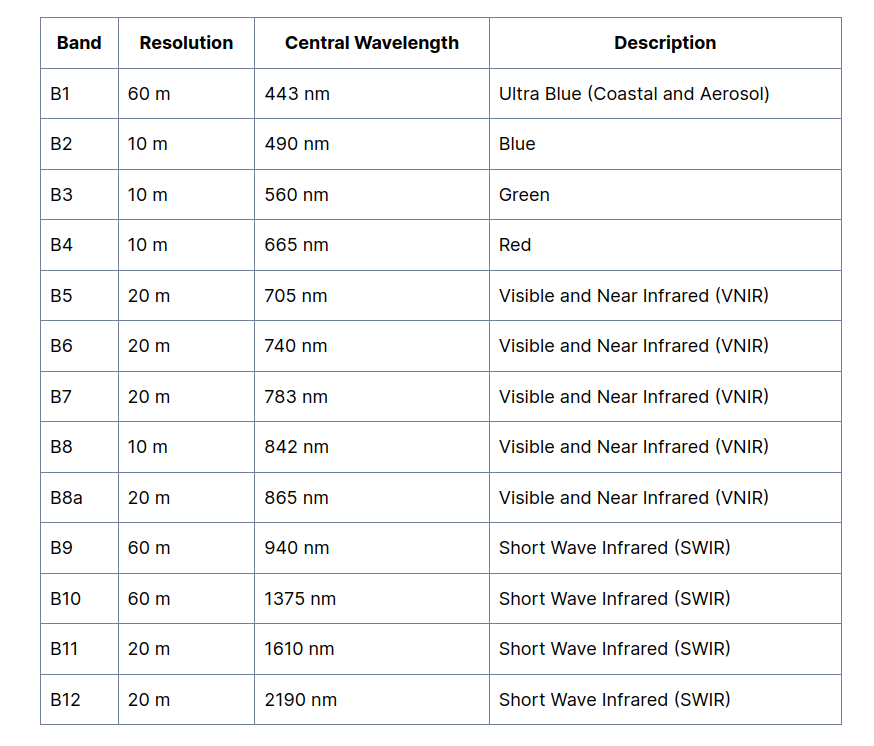

Carlos Figueroa, cdf5579, HW 3

To identify crops, some bands are more helpful than others. For example, B2-B4 are the visible spectrum and reflect what we see, near-infrared wavelengths can be sensitive to chlorophyll and short wave infrared (SWIR) wavelengths are sensitive to water content. Bands such as B1 and B10, however, respond more to clouds and particles in the air and are therefore less useful here. 

Scientists also create indices for certain purposes. These indices are combinations of values from different bands. For our purposes, the normalized difference vegetation index (NDVI) will be helpful as it is specifically suited to identifying plants. It is calculated as:

$$ NDVI = (B8 - B4) / (B8 + B4) $$

We will use data collected from the Togolese Republic (as described in [this paper](https://arxiv.org/pdf/2006.16866.pdf), with data accessed through [this repo](https://github.com/nasaharvest/cropharvest)). 

The data contains 1290 data points in the training set and 306 in the test set. Each data point represents one spatial location, and contains all Sentintel-2 bands except B1 and B10 plus the pre-calculated NDVI. Therefore, each data point has 12 features in total. Each point is labeled as containing crops (1) or not (0).   

Download the npz [here](https://drive.google.com/file/d/14jJCC0srUmoAIWWOESE-s4mWbMq3OrH9/view?usp=sharing) and unpack it as below. 

In [2]:
import numpy as np
data = np.load('togo_crops_data.npz')

In [3]:
X_train = data['arr_0']; y_train = data['arr_1']; X_test = data['arr_2']; y_test = data['arr_3']
X_train.shape

(1290, 12)

In [4]:
X_train

array([[-0.73578661, -0.6912585 , -0.06259203, ..., -0.58007712,
        -0.71304219,  0.74844288],
       [-0.73565768, -1.12094655, -0.06055687, ..., -0.41235572,
        -0.6951054 ,  0.94777712],
       [-0.18915923,  0.04870617, -0.10804395, ..., -0.60712896,
        -0.70967904,  0.52768487],
       ...,
       [ 0.19320872, -0.112601  ,  0.19519498, ..., -0.30414837,
         0.27348104,  0.3795814 ],
       [ 0.57897735, -0.06088848, -0.37329322, ..., -0.44346534,
        -0.5011639 ,  0.21471149],
       [ 0.66355938,  0.93222561, -0.36854451, ..., -0.3156454 ,
        -0.38905899, -0.14390384]])

Plot histograms of the training values of each feature. Specifically, for each feature, make a single plot that contains two histograms: one of the values for locations with crops and one for those without *(1 pt)*. Set the bins the same for each *(.5 pt)* and reduce the transparency of each so that both are visible *(.5 pt)*. E.g., they should look something like this: 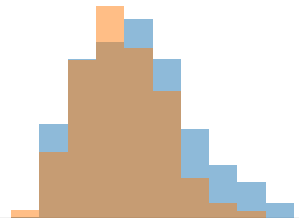

Based on these plots, do you think the first feature would be useful for identifying crops? What about the 8th? *(.5 pt each)*


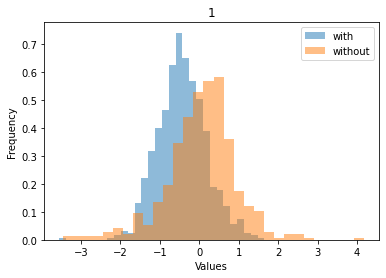

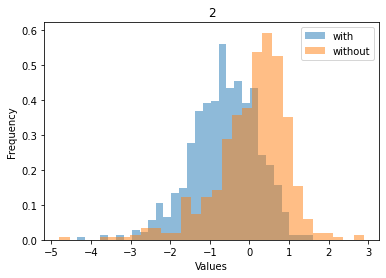

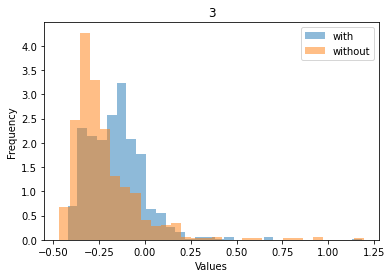

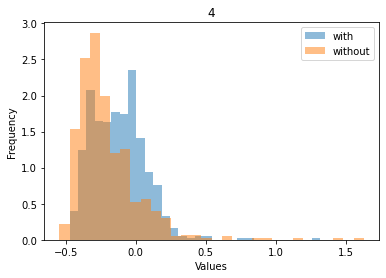

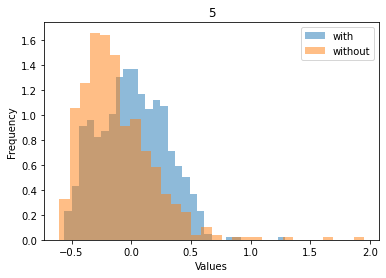

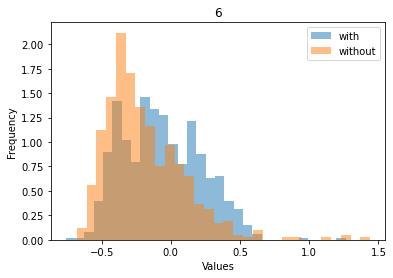

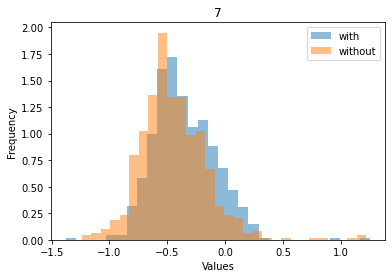

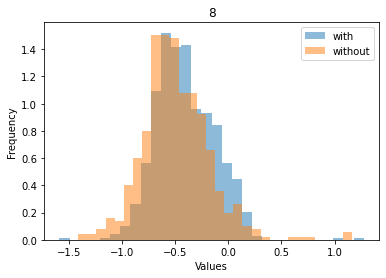

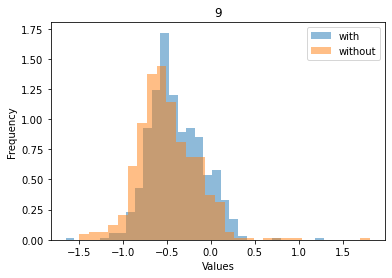

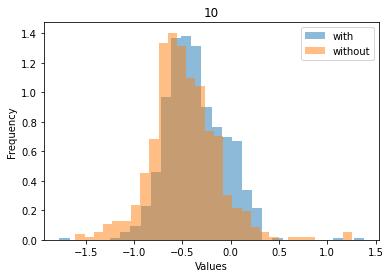

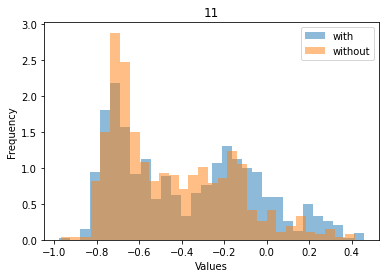

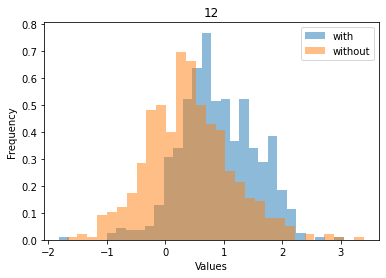

In [7]:
import matplotlib as plt
from matplotlib import pyplot as plt

for col in range(len(X_train.T)):
    yt1= X_train.T[col][y_train == 1]
    yt0= X_train.T[col][y_train == 0]
    
    plt.hist(yt1, bins=30, density = True, alpha = .5, label = "with")
    plt.hist(yt0, bins=30, density = True, alpha = .5, label = "without")
    plt.title(col + 1)
    plt.legend()
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()
    

The first feature is seems to be very useful, since we can see a clear difference between the with and without regarding the specific feature. Same thing for the second and third, and maybe the fourth. After that, we can't see much of a difference between the with or without. In the 8th, two graphs are almost overlapping, and we won't be able to identify crops easily as feature 1. 

Train a logistic regression model on the training data to classify each data point as containing crops or not *(1 pt)*. Evaluate the model separately on both the training and test set according to the overall classification accuracy. Because this a binary classification model, we can also use more fine-grained measures of performance such as [precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall). Evaluate the model on these metrics as well *(.5 pt for each metric for training and test - 3 pts total)*. 

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=16)

#Now we fit the model before predictions
log_reg.fit(X_train, y_train)

#store predictions for train and test
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

In [23]:
#we check accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("\n Accuracy Scores----------------------------------------\n")

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

print("\n Precision Scores----------------------------------------\n")

print("Train Precision:", precision_score(y_train, y_pred_train))
print("Test Precision", precision_score(y_test, y_pred_test))

print("\n Recall Scores----------------------------------------\n")

print("Train Recall:", recall_score(y_train, y_pred_train))
print("Test Recall", recall_score(y_test, y_pred_test))


 Accuracy Scores----------------------------------------

Train Accuracy: 0.7511627906976744
Test Accuracy 0.7352941176470589

 Precision Scores----------------------------------------

Train Precision: 0.7526041666666666
Test Precision 0.5886524822695035

 Recall Scores----------------------------------------

Train Recall: 0.8152327221438646
Test Recall 0.7830188679245284



Looking at the results on the test data, which is your model better at: catching true crops that exist or not labeling non-crops as crops? *(1 pt)*

Catching true crops that exist: we will expect a high rate for True Positives. Not labeling non-crops as crops: we will expect a high rate for True Negatives, or small for False Positives

Precision catches true positives out of all positives (from the actual results), which is about 0.588. Which means that our model is not that good at catching true crops that exist, and labeling them as crops.

Recall catches true positives out of true positives + false negatives (from the predicted results), which is about 0.783. Then, we can say that our model, using log regression, is better at not labeling non-crops as crops, because these results are better than the ones we have for precision scores. Recall that the recall method  doesn't care if any negative samples are classified as positive. 

Accuracy is ok, but we did need those other two metrics to differentiate where our model was underperforming and overperforming.

Create two new data sets from this data: one that only contains the 3rd through 11th features and one that contains the remaining three features *(.5 pt for each)*. Train two new logistic regression models with these two new datasets and report their test accuracy *(.5 pt for each)*. In this case, does the model with more features perform better? Why or why not? *(1pt)*

In [30]:
X_train_1 = X_train[:, 2:11]
X_test_1 = X_test[:, 2:11]

# fit the model with data
log_reg.fit(X_train_1, y_train)

y_pred_train_1 = log_reg.predict(X_train_1)
y_pred_test_1= log_reg.predict(X_test_1)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_1))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_1))

Train Accuracy: 0.6565891472868217
Test Accuracy: 0.7320261437908496


In [29]:
X_train_2 = X_train[:, [0,1,11]]
X_test_2 = X_test[:, [0,1,11]]

# fit the model with data
log_reg.fit(X_train_2, y_train)

y_pred_train_2 = log_reg.predict(X_train_2)
y_pred_test_2 = log_reg.predict(X_test_2)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_2))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_2))

Train Accuracy: 0.7015503875968992
Test Accuracy: 0.8006535947712419


The model with 9 features (X_train_1) is performed worse than the model with 3 features (X_train_2). We say this because the test accuracy, which is comparing with the actual data, is way higher for the model with 3 features(X_train_1). Then, we will prefer using the second model (the one with tree features), if what we cared about is accuracy. However, this really depends on what is the purpose of our models: for instance, if what we are looking for is high precision on true positives, or reduction of false negatives and so on, as we saw in the last section where we used recall and precision scores